In [ ]:
suppressMessages(library(RCurl)) # for downloading files
suppressMessages(library(dplyr)) # data manipulation
suppressMessages(library(grid)) # for textGrob
suppressMessages(library(gridExtra)) # for arranging plots
suppressMessages(library(ggplot2)) # plotting
suppressMessages(library(data.table)) # loading csv files
suppressMessages(library(RColorBrewer)) # for ColorBrewer palettes

In [2]:
# setting dmso pairwise scores data path
dmso_pairwise_scores <- file.path("./results/final_pairwise_scores.csv")
if (!file.exists(dmso_pairwise_scores)) {
  stop("Please run ./pairwise-compair.ipynb first to generate the pairwise scores.")
}

# setting trt pairwise scores data path
trt_pairwise_scores <- file.path("./results/final_trt_pairwise_scores.csv")
if (!file.exists(trt_pairwise_scores)) {
  stop("Please run ./pairwise-compair.ipynb first to generate the pairwise scores.")
}

# creating a figures directory in the results folder
plot_output_dir <- "./results/figures"
if (!dir.exists(plot_output_dir)) {
  dir.create(plot_output_dir, recursive = TRUE)
}


## Creating a histogram of the pairwise compare scores with only controls

In [3]:
# loading csv files
dmso_pairwise_df <- fread(dmso_pairwise_scores)
trt_pairwise_df <- fread(trt_pairwise_scores)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


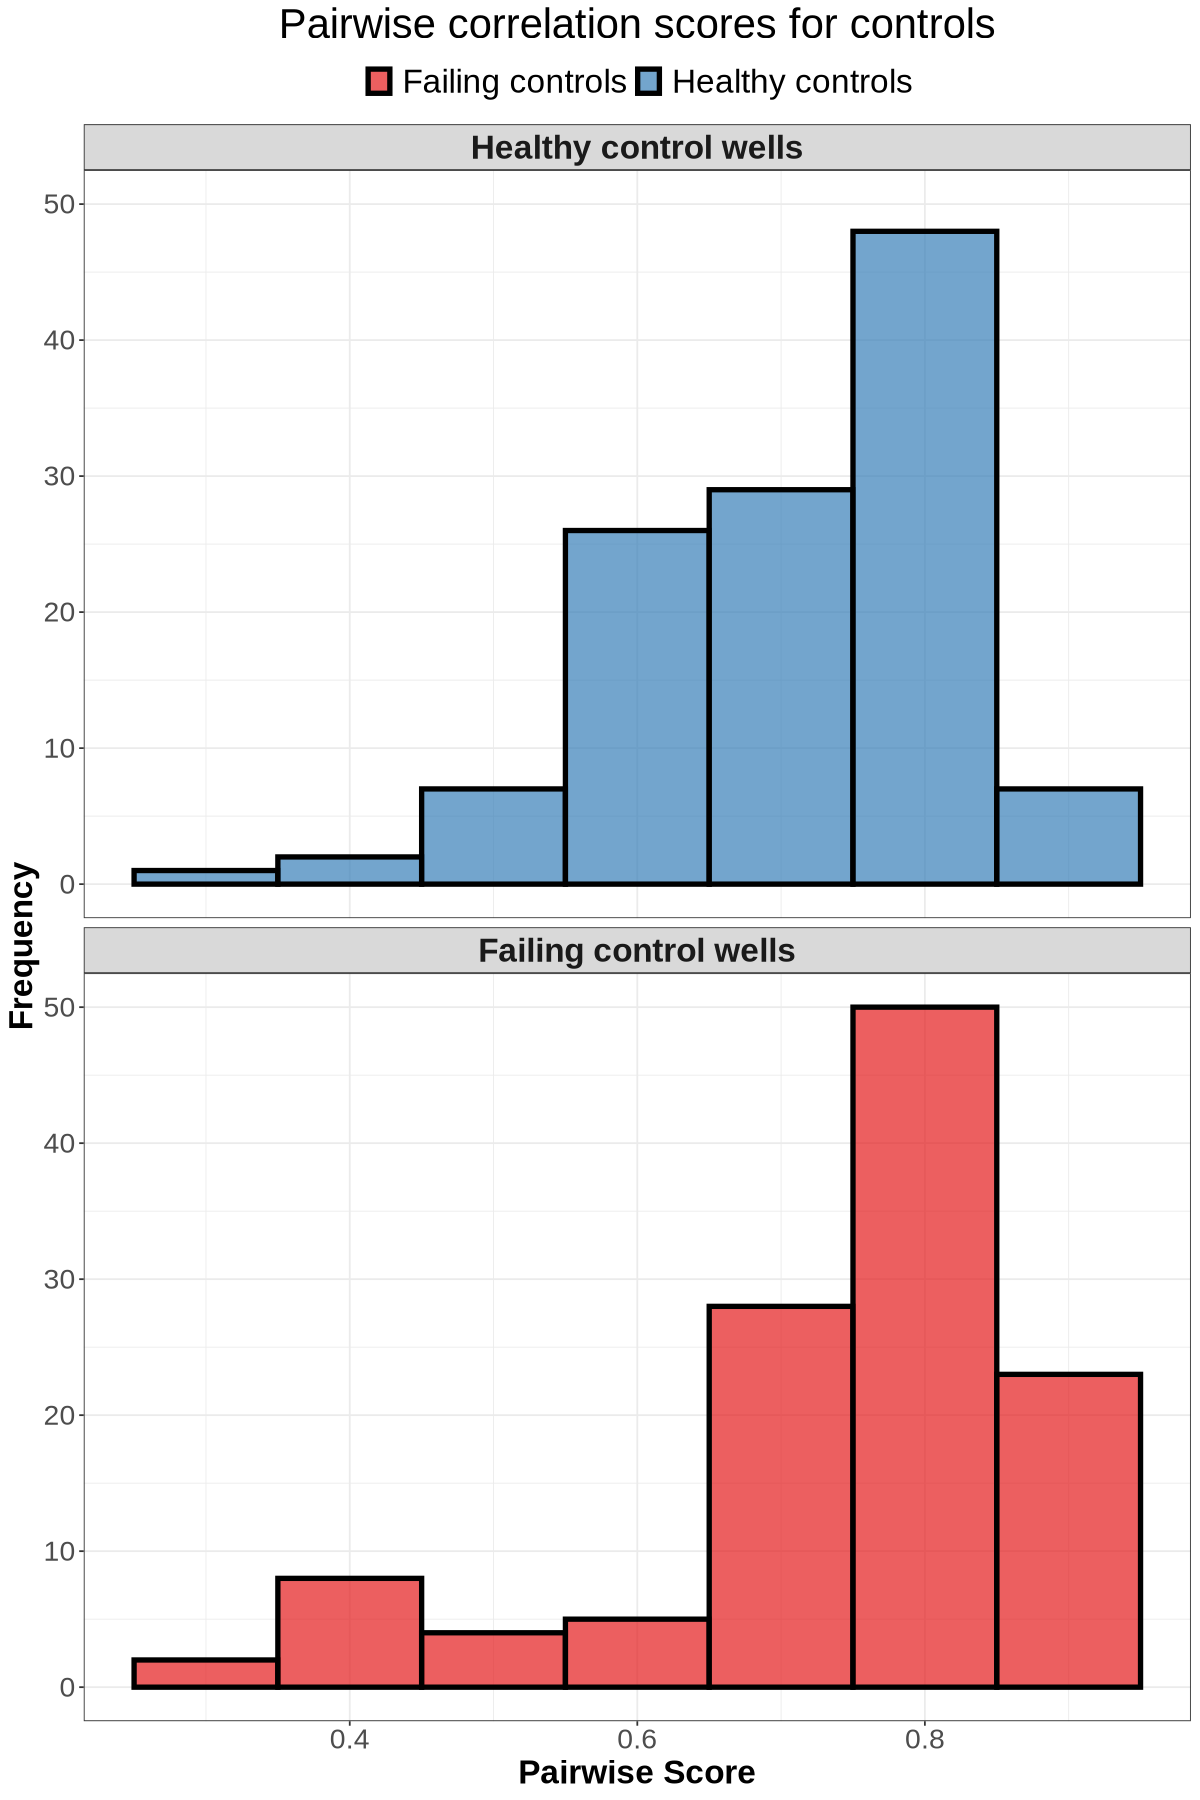

In [4]:
# setting the figure size for the notebook
width <- 10
height <- 15
options(repr.plot.width = width ,repr.plot.height = height)

# creating a histogram of the dmso pairwise scores using ggplot2 while
# creating a facet using the Metadata_treatment column and assigning colors
dmso_pairwise_histogram <- ggplot(dmso_pairwise_df, aes(x = pearsons_correlation, fill = Metadata_treatment)) +
     geom_histogram(binwidth = 0.1, color = "black", size = 1.5, alpha = 0.7) +
     
     # reordering Metadata_treatment to ensure "Healthy" is on top
     facet_wrap(~factor(Metadata_treatment, levels = c("DMSO-positive", "DMSO-negative")), 
                ncol = 1,  # Arrange facets from top to bottom
                labeller = as_labeller(c(
                     "DMSO-negative" = "Failing control wells",
                     "DMSO-positive" = "Healthy control wells"
                ))) +
     
     # setting the color for the histogram bars
     # using the Metadata_treatment column to assign colors
     scale_fill_manual(
          values = brewer.pal(3, "Set1")[1:2], # using ColorBrewer palette
          labels = c("DMSO-negative" = "Failing controls", "DMSO-positive" = "Healthy controls")
     ) +

     # adding labels and titles
     labs(
          title = "Pairwise correlation scores for controls",
          x = "Pairwise Score",
          y = "Frequency"
     ) +

     # setting the theme for the plot and 
     # adjusting the legend position and text size
     theme_bw() +
     theme(
          legend.position = "top",
          legend.title = element_blank(),
          legend.text = element_text(size = 20),
          axis.text.x = element_text(size = 17),
          axis.text.y = element_text(size = 17),
          axis.title.x = element_text(size = 20, face = "bold"),
          axis.title.y = element_text(size = 20, face = "bold"),
          plot.title = element_text(hjust = 0.5, size = 25),
          strip.text = element_text(size = 20, face = "bold")
     ) 

# save plot into figures directory
ggsave(
     filename = file.path(plot_output_dir, "dmso_pairwise_histogram.png"),
     plot = dmso_pairwise_histogram,
     width = 15,
     height = 10,
     dpi = 300
)

dmso_pairwise_histogram


Creating a heat map of the correlation pairwise scores of the controls to the individual scores of each compairson of controls

In [5]:
# only select rows where Metadata_trement is "DMSO-positive" 
healthy_dmso_pairwise_df <- dmso_pairwise_df %>%
     filter(Metadata_treatment == "DMSO-positive") %>%
     select(pearsons_correlation, Metadata_treatment, plate_well_0, plate_well_1) %>%
     arrange(desc(pearsons_correlation))

# only select rows where Metadata_trement is "DMSO-negative"
failing_dmso_pairwise_df <- dmso_pairwise_df %>%
     filter(Metadata_treatment == "DMSO-negative") %>%
     select(pearsons_correlation, Metadata_treatment, plate_well_0, plate_well_1) %>%
     arrange(desc(pearsons_correlation))

TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name                grob
1 1 (2-2,1-1) arrange      gtable[layout]
2 2 (3-3,1-1) arrange      gtable[layout]
3 3 (1-1,1-1) arrange text[GRID.text.361]

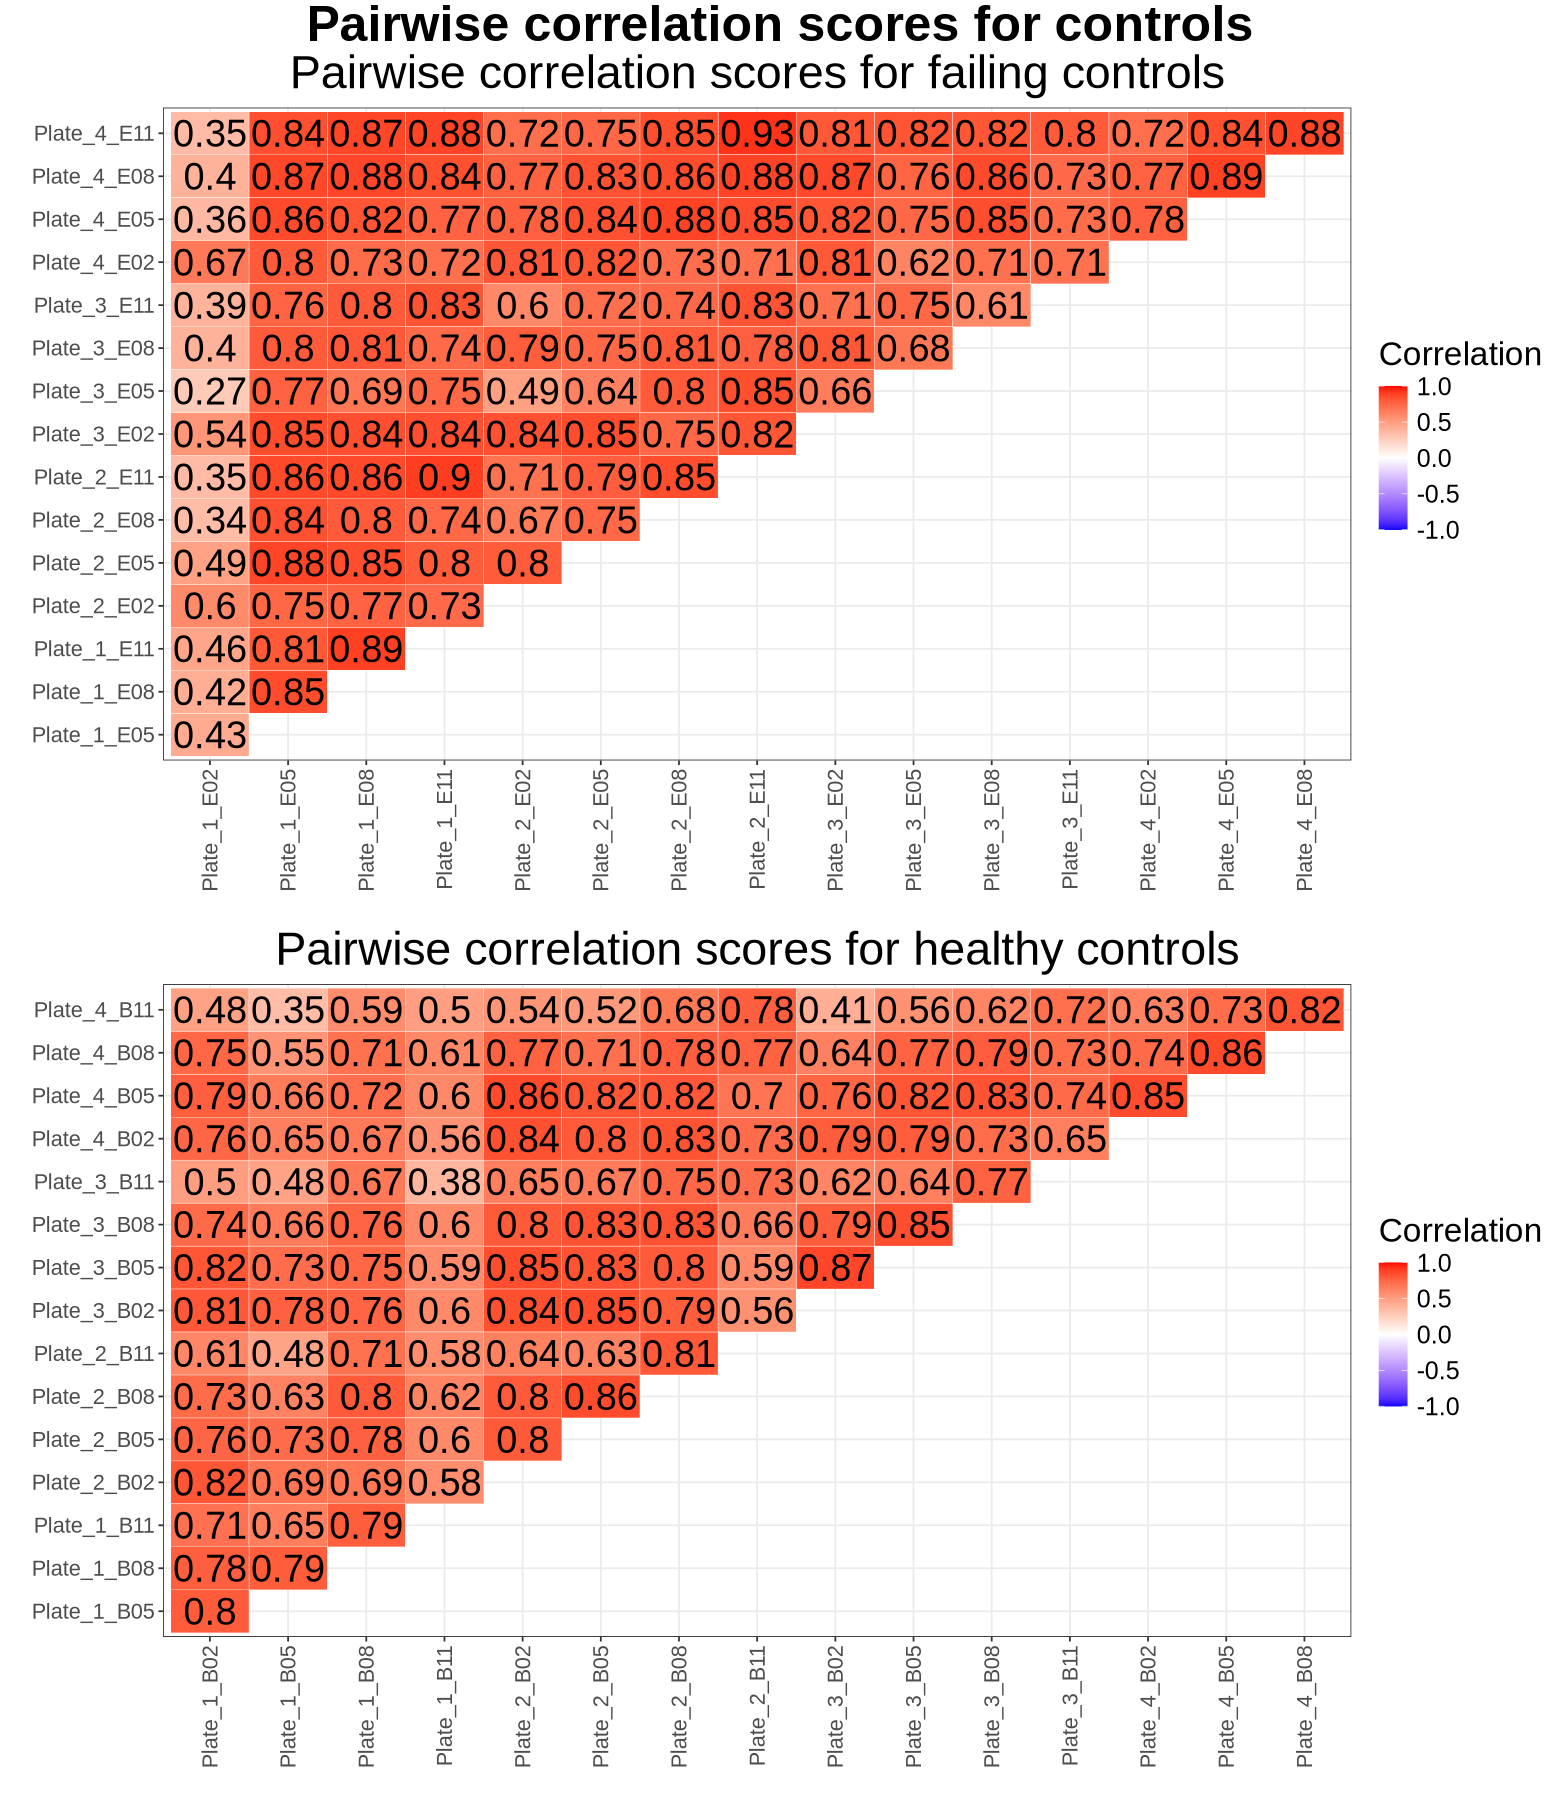

In [6]:
# update the option for display figure in notebook
options(repr.plot.width = 13, repr.plot.height = 15)

# create a heatmap of the failing dmso pairwise scores with annotations
failing_dmso_pairwise_heatmap <- ggplot(failing_dmso_pairwise_df, aes(x = plate_well_0, y = plate_well_1)) +
     geom_tile(aes(fill = pearsons_correlation), color = "white") +
     geom_text(aes(label = round(pearsons_correlation, 2)), size = 8) +  
     scale_fill_gradient2(
          low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-1, 1),
          name = "Correlation"  # Updated legend title
     ) +
     labs(
          title = "Pairwise correlation scores for failing controls",
          x = "",
          y = ""
     ) +
     theme_bw() +
     theme(
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 13),  
          axis.text.y = element_text(angle = 0, hjust = 1, size = 13),  
          plot.title = element_text(hjust = 0.5, size = 28),
          legend.text = element_text(size = 15), 
          legend.title = element_text(size = 20, margin = margin(b = 10)) 
     )

# create a heatmap of the healthy dmso pairwise scores with annotations
dmso_pairwise_heatmap <- ggplot(healthy_dmso_pairwise_df, aes(x = plate_well_0, y = plate_well_1)) +
     geom_tile(aes(fill = pearsons_correlation), color = "white") +
     geom_text(aes(label = round(pearsons_correlation, 2)), size = 8) +  
     scale_fill_gradient2(
          low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-1, 1),
          name = "Correlation"  # Updated legend title
     ) +
     labs(
          title = "Pairwise correlation scores for healthy controls",
          x = "",
          y = ""
     ) +
     theme_bw() +
     theme(
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 13),  
          axis.text.y = element_text(angle = 0, hjust = 1, size = 13),  
          plot.title = element_text(hjust = 0.5, size = 28),
          legend.text = element_text(size = 15), 
          legend.title = element_text(size = 20, margin = margin(b = 10)) 
     )
     
# now merge the heatmaps into one figures 
heatmap_plot = grid.arrange(
     failing_dmso_pairwise_heatmap,
     dmso_pairwise_heatmap,
     ncol = 1,
     top = textGrob("Pairwise correlation scores for controls", gp = gpar(fontsize = 30, fontface = "bold"))
)

# now save the heatmap plot into the figures directory
ggsave(
     filename = file.path(plot_output_dir, "dmso_pairwise_heatmap.png"),
     plot = heatmap_plot,
     width = 15,
     height = 20,
     dpi = 300
)

heatmap_plot

## Creating box plot 

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


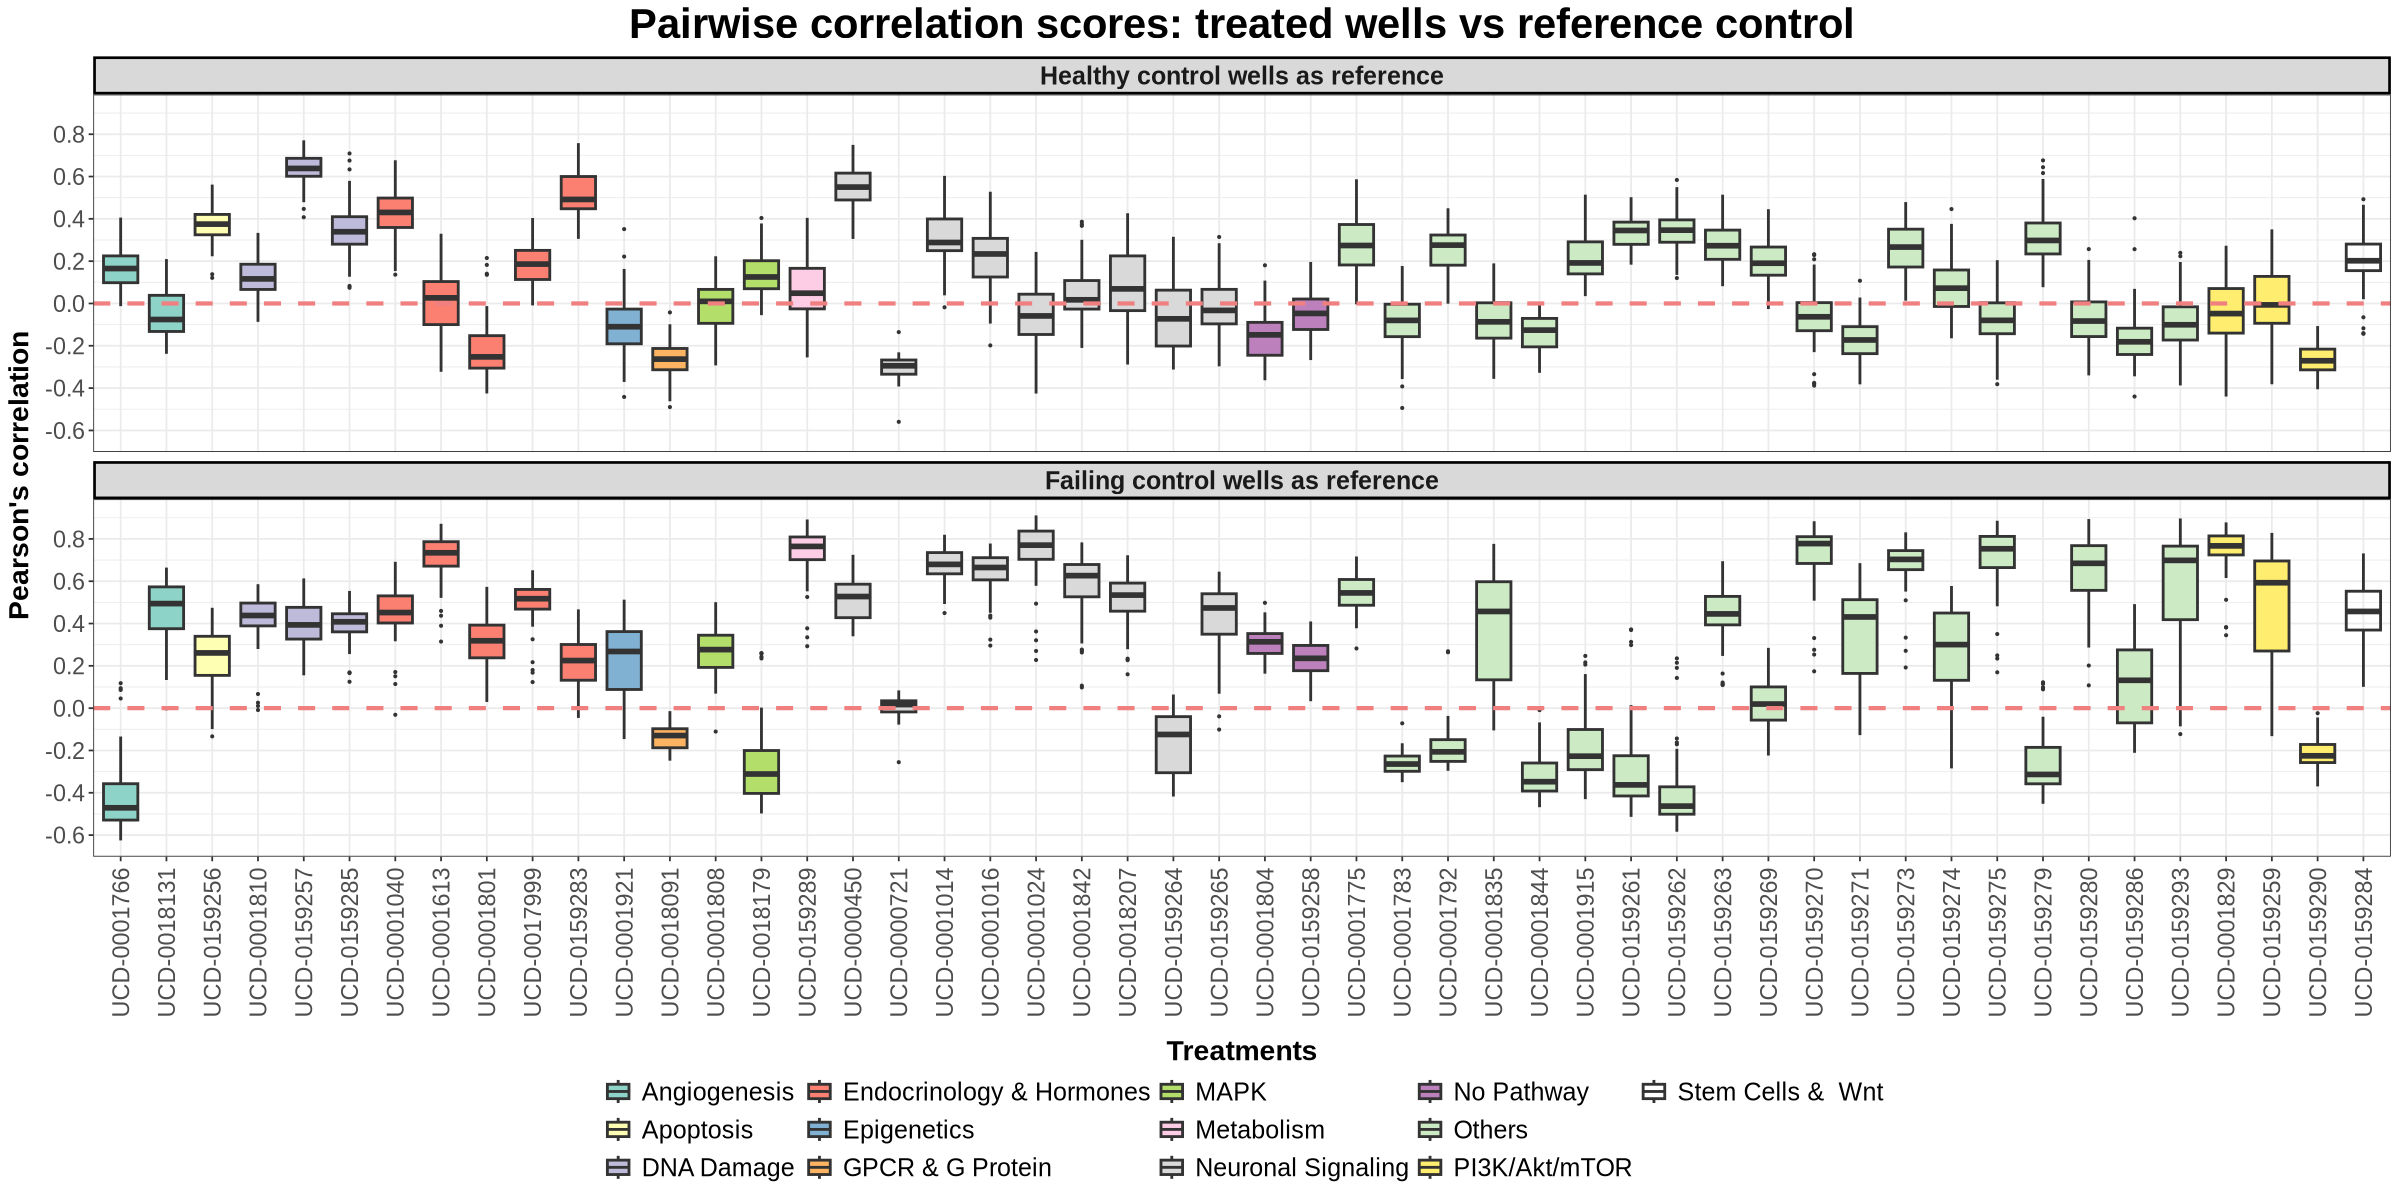

In [7]:
# Reordering the reference factor to place "Healthy" on top
trt_pairwise_df$reference <- factor(trt_pairwise_df$reference, levels = c("Healthy", "Failing"))

# Reordering Metadata_treatment based on the order of Metadata_Pathway
trt_pairwise_df$Metadata_treatment <- factor(trt_pairwise_df$Metadata_treatment, 
                                             levels = unique(trt_pairwise_df$Metadata_treatment[order(trt_pairwise_df$Metadata_Pathway)]))

# setting figure size for the notebook
width <- 20
height <- 10
options(repr.plot.width = width ,repr.plot.height = height)

# creating a boxplot of the dataset using ggplot2
pairwise_score_boxplot <- ggplot(trt_pairwise_df, aes(x = Metadata_treatment, y = pearsons_correlation, fill = Metadata_Pathway)) +
    geom_boxplot(outlier.size = 0.5, linewidth = .8) +  # Increased edge thickness of the boxplot
    
    # adding a light red horizontal line at y = 0
    geom_hline(yintercept = 0, color = "lightcoral", linetype = "dashed", linewidth = 1.2) +
    
    # setting up the facet for the boxplot
    # using the reference column to create separate boxplots
    facet_wrap(~reference, ncol = 1, labeller = as_labeller(c(
        "Healthy" = "Healthy control wells as reference",
        "Failing" = "Failing control wells as reference"
    ))) +
    
    # setting the color for the boxplot bars
    # using the Metadata_Pathway column to assign colors
    scale_fill_brewer(palette = "Set3") +

    # adding labels and titles
    labs(
        title = "Pairwise correlation scores: treated wells vs reference control",
        x = "Treatments",
        y = "Pearson's correlation"
    ) +

    # setting the y-axis ticks with separation of 0.2
    scale_y_continuous(breaks = seq(-1, 1, by = 0.2)) +

    # setting the theme for the plot and 
    # adjusting the legend position and text size
    theme_bw() +
    theme(
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 15),
        axis.text.x = element_text(size = 14, angle = 90, vjust = .5), 
        axis.text.y = element_text(size = 14), 
        axis.title.x = element_text(size = 17, face = "bold", vjust = -1.7),
        axis.title.y = element_text(size = 17, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 25,face = "bold"),
        strip.text = element_text(size = 15, face = "bold"),
        strip.background = element_rect(color = "black", size = 1.5) 
    ) 

# save plot into figures directory
ggsave(
    filename = file.path(plot_output_dir, "trt_pairwise_boxplot.png"),
    plot = pairwise_score_boxplot,
    width = 20,
    height = 10,
    dpi = 300
)

pairwise_score_boxplot